# Mobile Net

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path+file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [5]:
from urllib.request import urlretrieve
ip = 'data/MobileNet-samples/'
os.makedirs(ip, exist_ok=True)
url1 = 'https://www.tampabay.com/resizer//5VUkLllQX3pP2g424XMHJTwE-Jg=/900x506/smart/filters:format(webP)/cloudfront-us-east-1.images.arcpublishing.com/tbt/54FSQ5EQMFDAVGCCZ25FJJ2I5M.jpg'
url2 = 'https://i.ytimg.com/vi/e4QT8eRA0Bw/maxresdefault.jpg'
url3 = "https://fittify.in/cdn/shop/articles/1_1aba4a24-2162-4e21-8c51-f4eb2c02aa6f.jpg?v=1673938218"
urlretrieve(url1,ip+'1.png')
urlretrieve(url2,ip+'2.png')
urlretrieve(url3,ip+'3.png')

('data/MobileNet-samples/3.png', <http.client.HTTPMessage at 0x2224e5e1d20>)

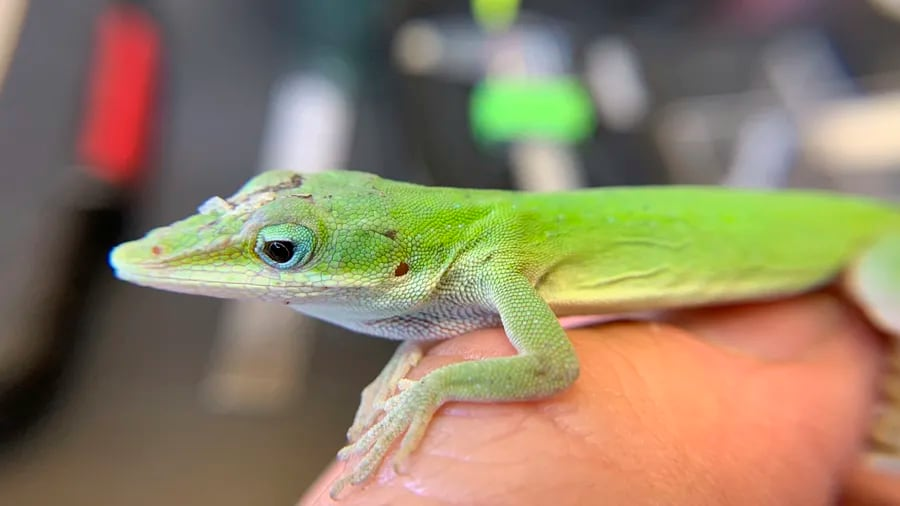

In [6]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.png' , width=300 , height=200)

In [7]:
preprocessed_image = prepare_image('1.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 3s 3s/step


[[('n01682714', 'American_chameleon', 0.721843),
  ('n01693334', 'green_lizard', 0.27038255),
  ('n01644373', 'tree_frog', 0.004855083),
  ('n01694178', 'African_chameleon', 0.0017392831),
  ('n01687978', 'agama', 0.00039146096)]]

In [8]:
assert results[0][0][1] == 'American_chameleon'

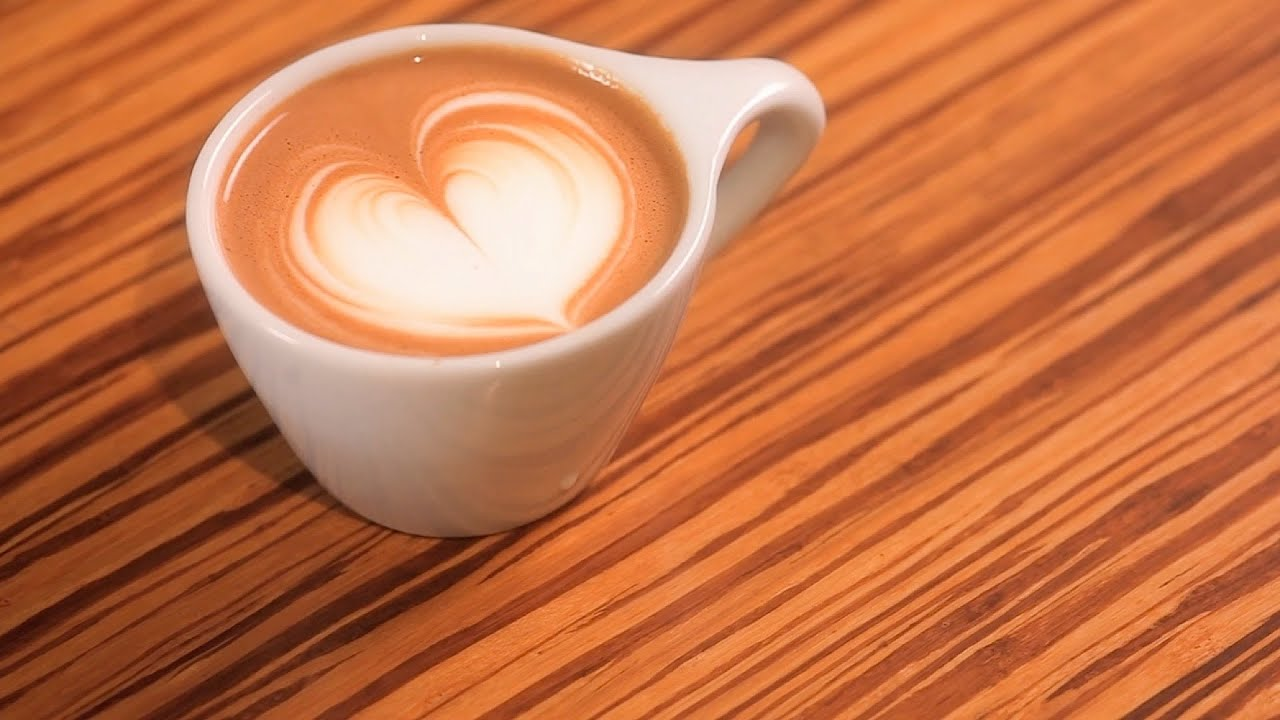

In [9]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/2.png' , width=300 , height=200)

In [10]:
preprocessed_image = prepare_image('2.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 21ms/step


[[('n07920052', 'espresso', 0.94447225),
  ('n07930864', 'cup', 0.024780938),
  ('n02948072', 'candle', 0.012002128),
  ('n03063599', 'coffee_mug', 0.011402683),
  ('n07932039', 'eggnog', 0.0040270127)]]

In [11]:
assert results[0][0][1] == 'espresso'

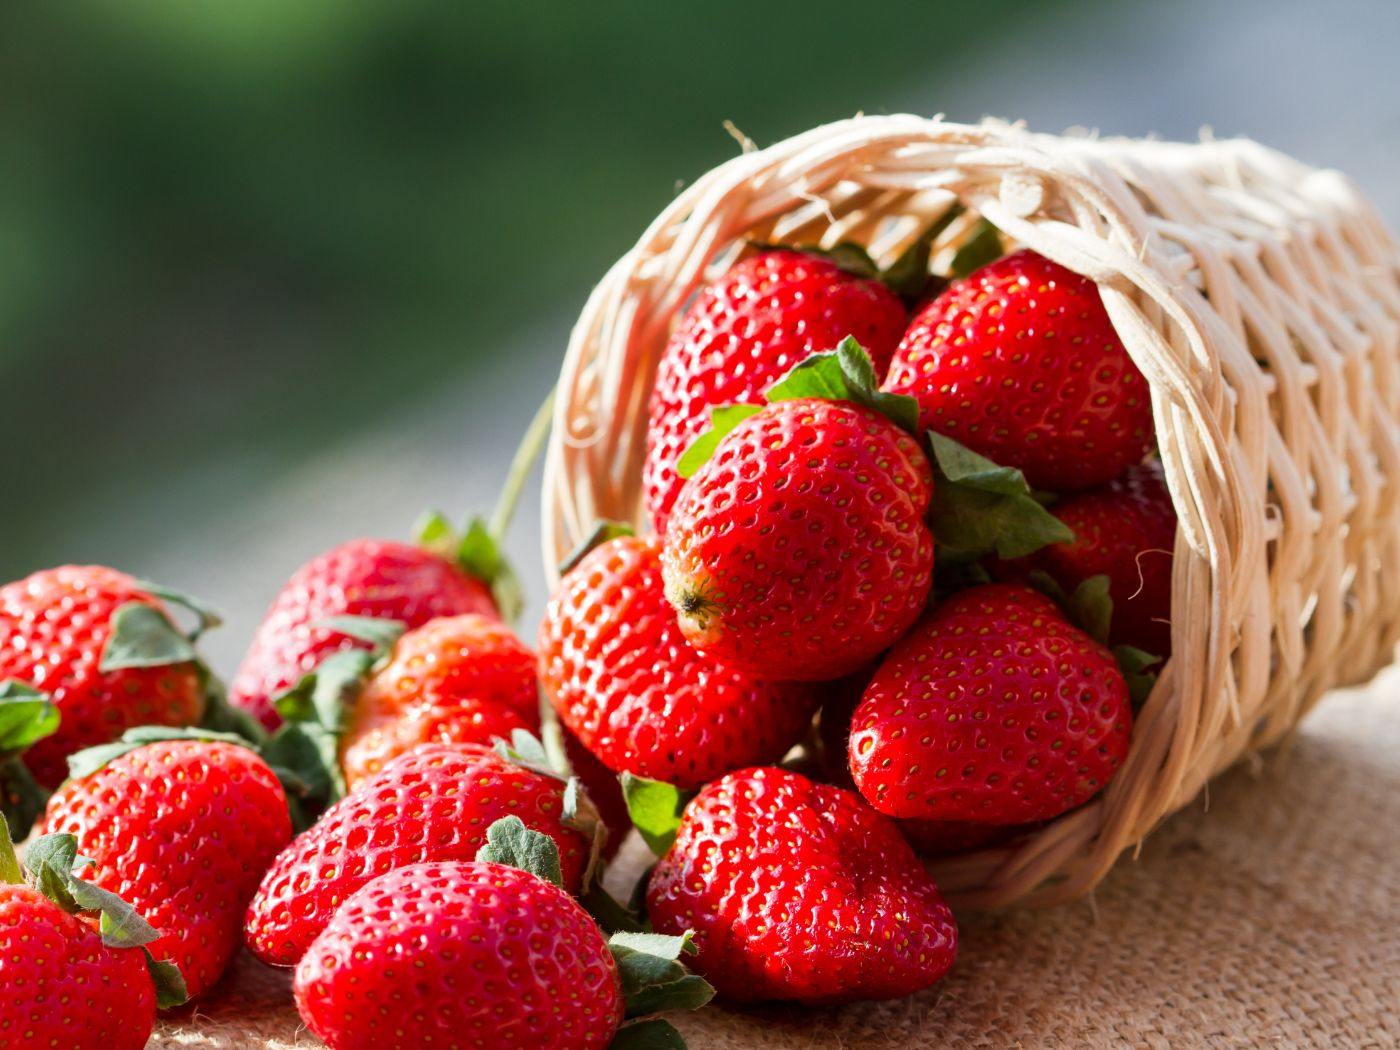

In [12]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/3.png' , width=300 , height=200)

In [13]:
preprocessed_image = prepare_image('3.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 28ms/step


[[('n07745940', 'strawberry', 0.9503269),
  ('n07614500', 'ice_cream', 0.010135703),
  ('n07613480', 'trifle', 0.009729774),
  ('n07734744', 'mushroom', 0.003661793),
  ('n07747607', 'orange', 0.0036535675)]]

In [14]:
assert results[0][0][1] == 'strawberry'

In [6]:
from zipfile import ZipFile
with ZipFile('Sign-Language-Digits-Dataset-master.zip' , 'r') as zip_file:
    zip_file.extractall('data/')
shutil.move('data/Sign-Language-Digits-Dataset-master/Dataset/', 'data/Sign-Language-Digits-Dataset/')
shutil.rmtree('data/Sign-Language-Digits-Dataset-master/')

In [7]:
os.chdir('data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f"train/{i}"), 30)
        for j in valid_samples:
            shutil.move(f"train/{i}/{j}", f"valid/{i}")

        test_samples = random.sample(os.listdir(f"train/{i}"), 5)
        for k in test_samples:
            shutil.move(f"train/{i}/{k}", f"test/{i}")
os.chdir('../..')

In [17]:
train_path = 'data/Sign-Language-Digits-Dataset/train'
valid_path = 'data/Sign-Language-Digits-Dataset/valid'
test_path = 'data/Sign-Language-Digits-Dataset/test'

In [42]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory = train_path, target_size=(224,224),class_mode='categorical',batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory = valid_path, target_size=(224, 224),class_mode='categorical', batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory = test_path, target_size=(224, 224),class_mode='categorical', batch_size=10, shuffle = False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [43]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

# Modify Model

In [94]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [95]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [96]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.shape.as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.shape.as_list()) for v in model.trainable_weights])
    return {'non_trainable_params':non_trainable_params, 'trainable_params':trainable_params}

In [97]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

In [98]:
x = mobile.layers[-2].output
output = Dense(units=10, activation='softmax')(x)

In [99]:
model = Model(inputs=mobile.input,outputs=output)

In [100]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [101]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [112]:
params = count_params(model)
assert params['non_trainable_params'] == 1370816
assert params['trainable_params'] == 2893058

# Train the model

In [103]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
model.fit(x=train_batches , validation_data=valid_batches , epochs=30, verbose=2)

Epoch 1/30
172/172 - 7s - loss: 0.8011 - accuracy: 0.7821 - val_loss: 1.7566 - val_accuracy: 0.7033 - 7s/epoch - 39ms/step
Epoch 2/30
172/172 - 5s - loss: 0.1222 - accuracy: 0.9638 - val_loss: 0.3116 - val_accuracy: 0.9267 - 5s/epoch - 31ms/step
Epoch 3/30
172/172 - 5s - loss: 0.0733 - accuracy: 0.9725 - val_loss: 0.3075 - val_accuracy: 0.9433 - 5s/epoch - 32ms/step
Epoch 4/30
172/172 - 5s - loss: 0.0281 - accuracy: 0.9877 - val_loss: 0.2196 - val_accuracy: 0.9667 - 5s/epoch - 30ms/step
Epoch 5/30
172/172 - 5s - loss: 0.0136 - accuracy: 0.9982 - val_loss: 0.2142 - val_accuracy: 0.9667 - 5s/epoch - 30ms/step
Epoch 6/30
172/172 - 5s - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.1940 - val_accuracy: 0.9800 - 5s/epoch - 30ms/step
Epoch 7/30
172/172 - 5s - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.2170 - val_accuracy: 0.9567 - 5s/epoch - 30ms/step
Epoch 8/30
172/172 - 5s - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.2164 - val_accuracy: 0.9633 - 5s/epoch - 30ms/step
Epoch 9/30
172/1

# Predict sign language digits

In [105]:
test_labels = test_batches.labels

In [106]:
predictions = model.predict(x=test_batches, verbose=0)

In [107]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [108]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [109]:
def plot_confusion_matrix(cm, classes,
                         normalize= False,
                         title="Confusion Matrix",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normaliza=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    tresh = cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color="white" if cm[i,j] > tresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


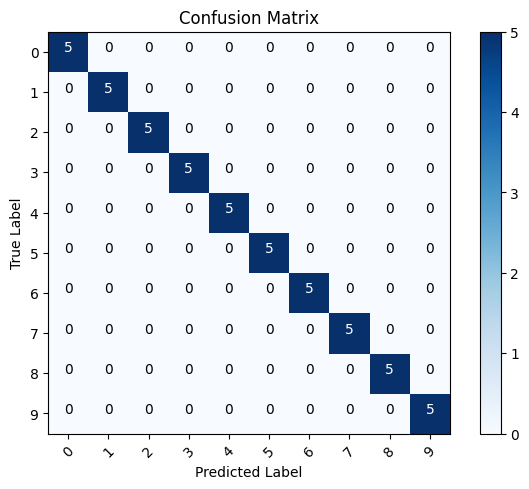

In [111]:
cm_plot_labels = [str(i) for i in range(10)]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [8]:
shutil.rmtree('data/Sign-Language-Digits-Dataset/')